# Time Trends Analysis

#### Provided the positive correlation between movie popularity and success*, we aim to answer the following questions:

- ROI in domestic v. foreign markets over time (Where should we market our films?)
- Worldwide ROI by genre over time (What genres should we produce for worldwide markets?)
- Popularity by genre over time among worldwide successes (Does this affirm the positive correlation between ROI and popularity?)

**See Analysis2.ipynb*

### Contents:
1. Import packages and look at dataset
2. Investigate single variable time trends
3. Where should we market our films?
4. What genres should we produce for worldwide markets?
5. Does popularity by genre over time among worldwide successes affirm the previous finding?

### 1. Import packages and look at dataset

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats
import datetime
import seaborn as sns
import random 

pd.set_option('display.max_columns', None)

%matplotlib inline

os.chdir('/Users/flatironschooldc3/FlatironSchoolRepo/dc-ds-111819/module-1/project/unzipped_data')
#os.chdir('/Users/flatironschooldc/Code/LearnCo/dc-ds-111819/module-1/project/data/')

In [87]:
films = pd.read_csv('films.csv')
# display(films.head())
# display(films.info())
# films.describe()

### 2. Investigate single variable time trends
#### Domestic ROI
There is a slight steady increase in domestic ROI over time. Movies are making money, and the slight increase may reflect inflation. There are clearly good years (2015) and bad years (2016).

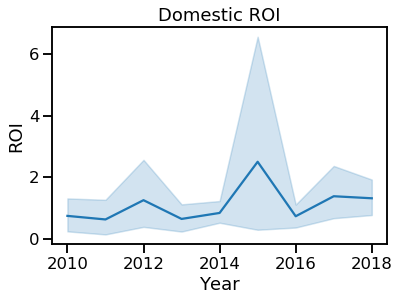

In [88]:
dr = sns.lineplot(data=films, x='year',y='domestic_roi')
dr.set(xlabel='Year', ylabel='ROI', title="Domestic ROI")

dr = plt.gcf()
plt.show()
dr.savefig('Dom_ROI.png', bbox_inches = "tight")

#### Worldwide ROI
This trend very closely mirrors that of domestic ROI. However, the worldwide ROIs are roughly 2-3x greater. This tells us that the worldwide market is significantly more profitable than the domestic market alone.

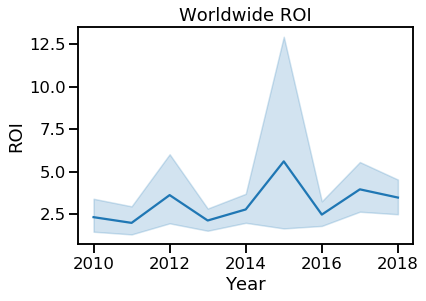

In [89]:
wr = sns.lineplot(data=films, x='year',y='worldwide_roi')
wr.set(xlabel='Year', ylabel='ROI', title="Worldwide ROI")

wr = plt.gcf()
plt.show()
wr.savefig('Wor_ROI.png', bbox_inches = "tight")

#### Production Budget
This graph is surprising because the peak ROI year in both worldwide and domestic markets (2015) also has the lowest production budget. However, other peaks (e.g. 2017) and troughs (e.g. 2011) in production budget mirror ROI values. While there may be some years of positive correlation between production budget and ROI, this is not a dependable correlation factor in the success of films.

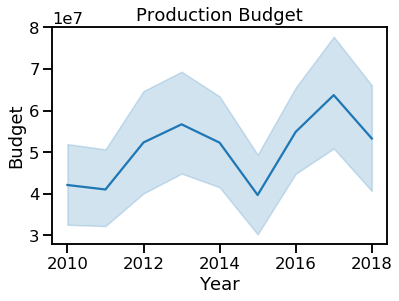

In [73]:
pb = sns.lineplot(data=films, x='year',y='production_budget')
pb.set(xlabel='Year', ylabel='Budget', title="Production Budget")

pb = plt.gcf()
plt.show()
pb.savefig('Prod_Bud.png', bbox_inches = "tight")

#### Popularity
Popularity increases dramatically over time. Interestingly, in high ROI year 2015, popularity dipped. Why is this? If popularity is a result of theater admission, how could this be? Are more people voting? Does the number of people voting mirror popularity? Do people rate more popular films as better?

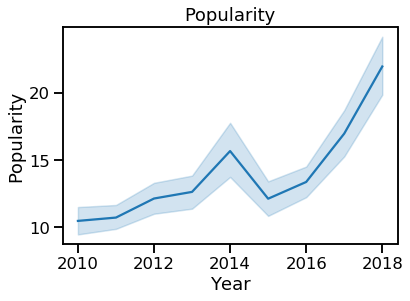

In [80]:
pop = sns.lineplot(data=films, x='year',y='popularity')
pop.set(xlabel='Year', ylabel='Popularity', title="Popularity")

pop = plt.gcf()
plt.show()
pop.savefig('Pop.png', bbox_inches = "tight")

#### Vote Counts
Number of votes has little correlation with popularity since 2015. Let's cross-reference with ratings.

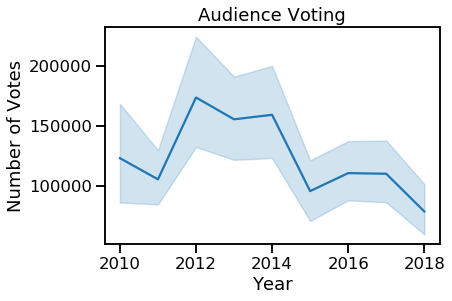

In [83]:
nv = sns.lineplot(data=films, x='year',y='numvotes')
nv.set(xlabel='Year', ylabel='Number of Votes', title="Audience Voting")

nv = plt.gcf()
plt.show()
nv.savefig('NumVotes.png', bbox_inches = "tight")

#### Average Rating
Average rating also has little correlation with popularity. However, number of votes and average rating have a strong correlation. Popularity remains a bit of a mystery variable.

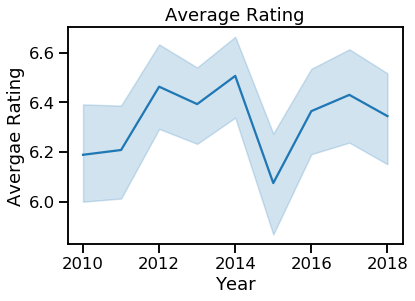

In [84]:
ar = sns.lineplot(data=films, x='year',y='averagerating')
ar.set(xlabel='Year', ylabel='Avergae Rating', title="Average Rating")

ar = plt.gcf()
plt.show()
ar.savefig('Prod_Bud.png', bbox_inches = "tight")

In [49]:
# How does everything look together?

# fig = sns.lineplot(data=pd.melt(films_yr, ['year']), x='year',y='value', hue='variable', legend='brief')
# box = fig.get_position()
# fig.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
# fig.legend(loc=0, bbox_to_anchor=(1.1, 1.1))
# plt.title("Observed Characteristics across Time")
# plt.xlabel("Year")
# plt.show()

# This graph is messy and it appears we need to subset the data to have a cleaner look.

### 3. Where should we market our films? 

In [97]:
sns.set_context("talk")

# Create function to plot relevant subsets of data together on one plot by first subetting df

# Self-tip: ax.set(xlabel='Xlabel', ylabel='Ylabel', title='Title', xlim=(xmin, xmax), ylim=(ymin, ymax))

def lineplot_melt(df, columns):
    df1=df.filter(items=['year', *columns])
    ax = sns.lineplot(data=pd.melt(df1, ['year']), x='year',y='value', hue='variable', legend='full')
    return ax

# Test function with multiple arguments:
# lineplot_melt(films, ['domestic_roi', 'worldwide_roi'])
# This works but does not allow for graph customization

#### Return on Investment in Domestic v. Worldwide Markets

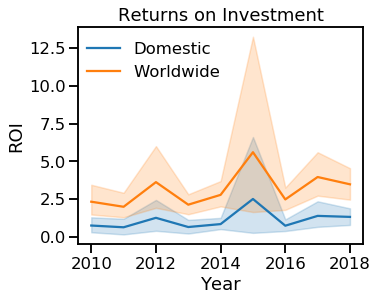

In [113]:
films_roi=films.filter(items=['year', 'domestic_roi', 'worldwide_roi'])
ax1 = sns.lineplot(data=pd.melt(films_roi, ['year']), x='year',y='value', hue='variable', legend='full')

box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 
# ax1.set_position([box.x0, box.y0, box.width * 2, box.height / 2]) 
# ax1.set_position([0, 0, 8, 3])
mylabels = ['Domestic','Worldwide']
ax1.legend(loc=0, bbox_to_anchor=(0.55, 1), labels = mylabels, frameon=False)
ax1.set(xlabel='Year', ylabel='ROI', title="Returns on Investment")
# Get current figure to save after showing
ax1 = plt.gcf()
plt.show()
ax1.savefig('DvW_ROI.png', bbox_inches = "tight")


## Attempt to show both subplots overlaid
# fig, ax1 = plt.subplots()

# # color = 'tab:red'
# # ax1.set_xlabel('time (s)')
# # ax1.set_ylabel('exp', color=color)
# # ax1.plot(t, data1, color=color)
# ax1 = sns.lineplot(data=pd.melt(films_roi, ['year']), x='year',y='value', hue='variable', legend='full')
# mylabels = ['Domestic','Worldwide']
# ax1.legend(loc=0, bbox_to_anchor=(0.55, 1), labels = mylabels, frameon=False)
# ax1.set(xlabel='Year', ylabel='ROI')
# ax1.tick_params(axis='y')


# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# # color = 'tab:red'
# # ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# # ax2.plot(t, data2, color=color)

# ax2 = sns.lineplot(data=films, x='year',y='production_budget', palette="Set1")
# mylabels2 = ['Budget']
# ax1.legend(loc=0, bbox_to_anchor=(0.55, 1), labels = mylabels2, frameon=False)
# ax2.set_ylabel('Budget')
# ax2.tick_params(axis='y')

# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()


#### Production Budget

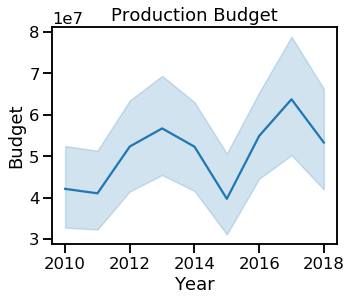

In [90]:
ax2 = sns.lineplot(data=films, x='year',y='production_budget')
ax2.set(xlabel='Year', ylabel='Budget', title="Production Budget")
ax2.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 

ax2 = plt.gcf()
plt.show()
ax2.savefig('Prod_Bud.png', bbox_inches = "tight")

### 4. What genres should we produce for worldwide markets?

In [122]:
genres = set(films.genres.apply(lambda x: str(x).split(',')).sum())
for genre in genres:
    films[genre] = films.genres.str.contains(genre)*1
    films[genre] = films[genre].fillna(0)
films['rgenre'] = films['genres'].apply(lambda x: random.choice(str(x).split(",")))

#create data subsets
films_wr = films.loc[films['worldwide_roi']>=2.5]
films_wr.head()

,Unnamed: 0,title,year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross_x,foreign_gross,release_date,production_budget,worldwide_gross,domestic_roi,worldwide_roi,original_language,original_title,popularity,vote_average,vote_count,title_change,History,Comedy,Drama,Animation,Sport,Action,Mystery,Biography,Crime,nan,Musical,Music,Sci-Fi,Family,War,Western,Thriller,Romance,Adventure,Horror,Fantasy,Documentary,rgenre
1,1,10 Cloverfield Lane,2016.0,103.0,"Drama,Horror,Mystery",7.2,260383.0,Par.,72100000.0,1.0,2016-03-11,5000000.0,108286422.0,13.416600,20.657284,en,10 Cloverfield Lane,17.892,6.9,4629,False,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Drama
7,7,22 Jump Street,2014.0,112.0,"Action,Comedy,Crime",7.0,319504.0,Sony,191700000.0,1.0,2014-06-13,50000000.0,331333876.0,2.834387,5.626678,en,22 Jump Street,11.176,6.9,5167,False,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,Crime
16,16,A Bad Moms Christmas,2017.0,104.0,"Adventure,Comedy",5.5,33056.0,STX,72100000.0,1.0,2017-11-01,28000000.0,127710550.0,1.575381,3.561091,en,A Bad Moms Christmas,16.604,6.3,1044,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Comedy
19,19,A Ghost Story,2017.0,92.0,"Drama,Fantasy,Romance",6.8,46280.0,A24,1600000.0,0.0,2017-07-07,100000.0,2769782.0,14.947980,26.697820,en,A Ghost Story,11.886,7.0,906,False,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,Romance
21,21,A Haunted House,2013.0,86.0,"Comedy,Fantasy",5.1,40308.0,ORF,40000000.0,1.0,2013-01-11,2500000.0,59922558.0,15.016673,22.969023,en,A Haunted House,6.909,5.5,871,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Comedy


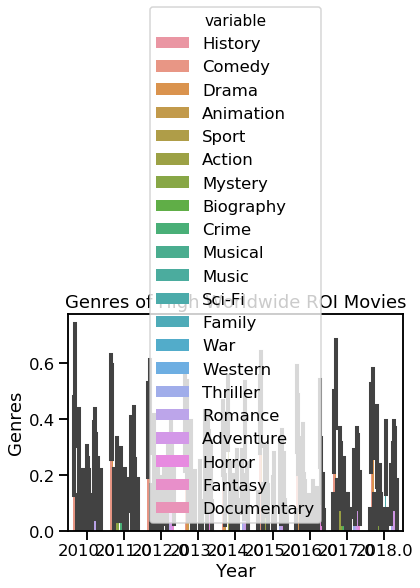

In [124]:
films_wr=films_wr.filter(items=['year', 'History', 'Comedy', 'Drama', 'Animation', 'Sport', 'Action', 'Mystery',
                                 'Biography', 'Crime', 'Musical', 'Music', 'Sci-Fi', 'Family', 'War', 'Western',
                                 'Thriller', 'Romance', 'Adventure', 'Horror', 'Fantasy', 'Documentary'])

ax3 = sns.barplot(data=pd.melt(films_wr, ['year']), x='year',y='value', hue='variable')

# box = ax3.get_position()
# ax1.set_position([box.x0, box.y0, box.width * 0.85, box.height]) 

# mylabels = ['Domestic','Worldwide']
# ax3.legend(loc=0, bbox_to_anchor=(0.55, 1), labels = mylabels, frameon=False)
ax3.set(xlabel='Year', ylabel='Genres', title="Genres of High Worldwide ROI Movies")
# Get current figure to save after showing
ax3 = plt.gcf()
plt.show()
ax3.savefig('wr_genre.png', bbox_inches = "tight")

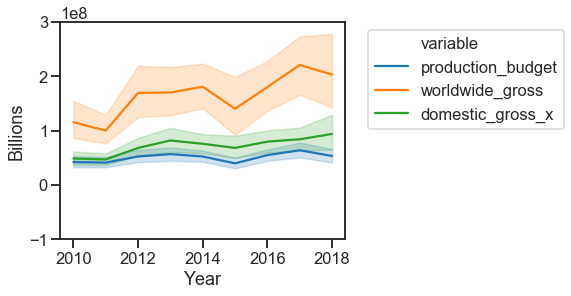

In [91]:
# lineplot_melt(films, ['production_budget','worldwide_gross', 'domestic_gross_x'])

films_bd=films.filter(items=['year','production_budget','worldwide_gross', 'domestic_gross_x'])
ax = sns.lineplot(data=pd.melt(films_bd, ['year']), x='year',y='value', hue='variable', legend='full')

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
# Put a legend to the right side
ax.legend(loc=0, bbox_to_anchor=(1.8, 1))
ax.set(xlabel='Year', ylabel='Billions', ylim=(-1e8, 3e8))
plt.show()

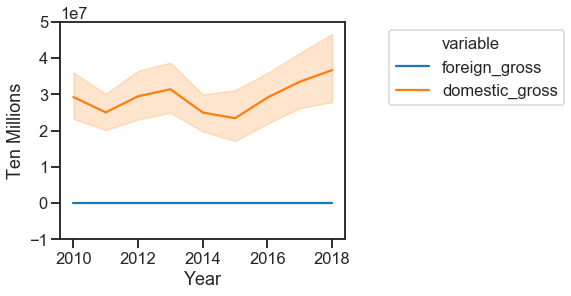

In [77]:
# lineplot_melt(films2, ['foreign_gross', 'domestic_gross'])

films2_bd=films2.filter(items=['year','foreign_gross', 'domestic_gross'])
ax2 = sns.lineplot(data=pd.melt(films2_bd, ['year']), x='year',y='value', hue='variable', legend='full')

box = ax2.get_position()
ax2.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
# Put a legend to the right side
ax2.legend(loc=0, bbox_to_anchor=(1.8, 1))
ax2.set(xlabel='Year', ylabel='Ten Millions', ylim=(-1e7, 5e7))
plt.show()
